<a href="https://colab.research.google.com/github/tthogho1/CompareImage/blob/main/Pix2PixTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/phillipi/pix2pix.git

Cloning into 'pix2pix'...
remote: Enumerating objects: 482, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 482 (delta 7), reused 18 (delta 5), pack-reused 457
Receiving objects: 100% (482/482), 2.45 MiB | 13.69 MiB/s, done.
Resolving deltas: 100% (257/257), done.


In [2]:
!git clone https://github.com/tdeboissiere/DeepLearningImplementations.git

Cloning into 'DeepLearningImplementations'...
remote: Enumerating objects: 1616, done.
remote: Total 1616 (delta 0), reused 0 (delta 0), pack-reused 1616
Receiving objects: 100% (1616/1616), 50.34 MiB | 41.87 MiB/s, done.
Resolving deltas: 100% (754/754), done.


In [3]:
!rsync -a DeepLearningImplementations/pix2pix/ pix2pix/

In [4]:
ls pix2pix/

data/      figures/  LICENSE  models.lua*  scripts/  test.lua*  util/
datasets/  imgs/     models/  README.md    src/      train.lua


In [11]:
ls ./datasets/

bibtex/  download_dataset.sh  facades/


In [7]:
import os
os.chdir('pix2pix/')

In [8]:
!bash ./datasets/download_dataset.sh facades

Specified [facades]
for details.

--2022-06-28 04:26:01--  http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/facades.tar.gz
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30168306 (29M) [application/x-gzip]
Saving to: ‘./datasets/facades.tar.gz’

./datasets/facades. 100%[===================>]  28.77M  1.89MB/s    in 18s     

2022-06-28 04:26:19 (1.61 MB/s) - ‘./datasets/facades.tar.gz’ saved [30168306/30168306]

facades/
facades/test/
facades/test/27.jpg
facades/test/5.jpg
facades/test/72.jpg
facades/test/1.jpg
facades/test/10.jpg
facades/test/100.jpg
facades/test/101.jpg
facades/test/102.jpg
facades/test/103.jpg
facades/test/104.jpg
facades/test/105.jpg
facades/test/106.jpg
facades/test/11.jpg
facades/test/12.jpg
facades/test/13.jpg
facades/test/14.jpg
facades/test/15.jpg
facades/test/1

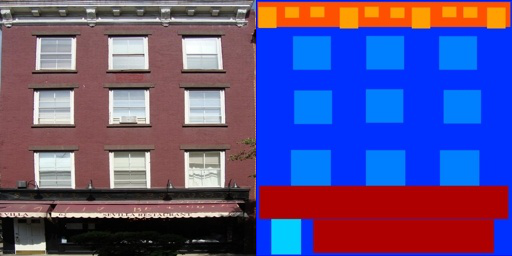

In [19]:
from PIL import Image
img = Image.open('./datasets/facades/train/4.jpg')
img


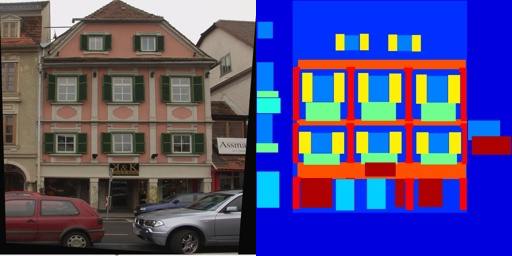

In [20]:
img = Image.open('./datasets/facades/val/4.jpg')
img

In [21]:
!python -V

Python 3.7.13


In [2]:
!pip install parmap==1.5.1
!pip install tqdm==4.48.0
!pip install opencv_python
!pip install h5py==2.9.0
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [34]:
os.chdir('./src/data')


/content/pix2pix/src/data


In [37]:
!python make_dataset.py ../../datasets/facades/ 3 --img_size 256

100% 4/4 [00:01<00:00,  2.25it/s]
100% 1/1 [00:00<00:00,  2.24it/s]
100% 1/1 [00:00<00:00,  2.38it/s]


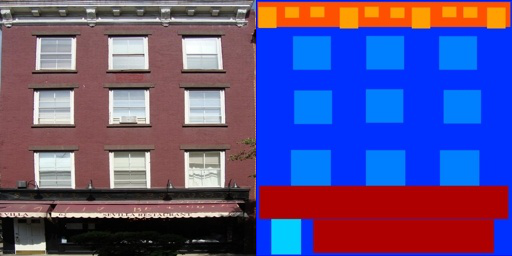

In [42]:
#!ls ../../datasets/facades/train
img = Image.open('../../datasets/facades/train/4.jpg')
img

In [7]:
os.chdir('../../src/model/')

NameError: ignored

In [44]:
!pip install pydot
!pip install graphviz
!pip install pydot3
!pip install pydot-ng

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pydot3: filename=pydot3-1.0.9-py3-none-any.whl size=21292 sha256=309b65c76bb0b317ec74867225344dec00d1a6b6e09d3ded2a45e9300d4f2d38
  Stored in directory: /root/.cache/pip/wheels/28/67/d5/e0735c1d0008aea7648541712f055604ac57f2ea9bacd4258f
Successfully built pydot3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [45]:
!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [6]:
#!cat -n train.py
#!sed -i -e "7s/keras.optimizers/tensorflow.keras.optimizers/" train.py
!pwd

/content


In [60]:
!python main.py 64 64 --backend tensorflow --nb_epoch 10

Traceback (most recent call last):
  File "main.py", line 50, in <module>
    import train
  File "/content/pix2pix/src/model/train.py", line 7, in <module>
    from keras.optimizers import Adam, SGD
ImportError: cannot import name 'Adam' from 'keras.optimizers' (/usr/local/lib/python3.7/dist-packages/keras/optimizers.py)


In [57]:
!cat -n models.py
!cp models.py models.py_bk
!sed -i -e "6s/keras.layers.normalization/tensorflow.keras.layers/" models.py # 1行目のhelloをgood morningに置き換える

     1	from keras.models import Model
     2	from keras.layers.core import Flatten, Dense, Dropout, Activation, Lambda, Reshape
     3	from keras.layers.convolutional import Conv2D, Deconv2D, ZeroPadding2D, UpSampling2D
     4	from keras.layers import Input, Concatenate
     5	from keras.layers.advanced_activations import LeakyReLU
     6	from tensorflow.keras.layers import BatchNormalization
     7	from keras.layers.pooling import MaxPooling2D
     8	import keras.backend as K
     9	import numpy as np
    10	
    11	
    12	def minb_disc(x):
    13	    diffs = K.expand_dims(x, 3) - K.expand_dims(K.permute_dimensions(x, [1, 2, 0]), 0)
    14	    abs_diffs = K.sum(K.abs(diffs), 2)
    15	    x = K.sum(K.exp(-abs_diffs), 2)
    16	
    17	    return x
    18	
    19	
    20	def lambda_output(input_shape):
    21	    return input_shape[:2]
    22	
    23	
    24	# def conv_block_unet(x, f, name, bn_mode, bn_axis, bn=True, dropout=False, strides=(2,2)):
    25	
    26	#     x = Conv2D(f, (

In [59]:
!ls
#!cat -n models.py

main.py  models.py  models.py_bk  __pycache__  README.md  train.py
